<a href="https://colab.research.google.com/github/TRISHA16-design/hello-world/blob/main/Colab_Preprocessing_Script_(Movies_%26_Reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: uplode file from file exporer

from google.colab import files

uploaded = files.upload()

Saving rotten_tomatoes_movie_reviews.csv to rotten_tomatoes_movie_reviews.csv
Saving rotten_tomatoes_movies.csv to rotten_tomatoes_movies.csv


In [1]:
# CELL 1: Imports and Load/Prepare Data
#--------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- IMPORTANT ---
# This script assumes 'final_df' (the DataFrame created at the end of
# your 'colab_preprocess_script_modified') is already loaded and available.
# If it's not, you would typically load your saved artifacts or re-run
# the relevant parts of your preprocessing script here to generate final_df.

# For demonstration purposes, let's simulate loading or create a placeholder final_df
# In your actual Colab notebook, replace this with loading your actual final_df
# or the original movies_df and reviews_df and then perform the merge and cleaning.

# Example: if you saved final_df after preprocessing
# try:
#     final_df = pd.read_pickle('final_df_preprocessed.pkl') # Assuming you saved it
# except FileNotFoundError:
#     print("Warning: 'final_df_preprocessed.pkl' not found. Using placeholder data.")
#     # Create a more representative placeholder based on rotten_tomatoes_movies columns
movies_data_placeholder = {
    'id': [f'm{i}' for i in range(100)],
    'title': [f'Movie Title {i}' for i in range(100)],
    'audienceScore': np.random.randint(0, 101, 100),
    'tomatoMeter': np.random.randint(0, 101, 100),
    'ratingContents': ['[G]', '[PG]', '[PG-13, violence]', '[R, language]', '[NC-17, nudity]'] * 20,
    'releaseDateTheatres': pd.to_datetime([f'{np.random.randint(2000, 2024)}-{np.random.randint(1,13)}-{np.random.randint(1,28)}' for _ in range(100)], errors='coerce'),
    'genre': ['Action, Adventure', 'Comedy', 'Drama, Romance', 'Action, Sci-Fi', 'Horror, Thriller'] * 20,
    'director': ['Director A', 'Director B', 'Director A', 'Director C', 'Director B'] * 20,
    'writer': ['Writer X', 'Writer Y', 'Writer Z', 'Writer X', 'Writer Y'] * 20,
    'critic_review_snippets': ['good movie fun action', 'very funny great cast', 'touching story beautiful', 'exciting visuals cool effects', 'scary suspenseful intense plot'] * 20,
    # Add other columns your final_df would have from preprocessing
    'tags': ['movie title 1 action adventure director a writer x good movie fun action'] * 100 # Simplified
}
final_df = pd.DataFrame(movies_data_placeholder)
# Convert relevant columns if they are not already (example)
final_df['audienceScore'] = pd.to_numeric(final_df['audienceScore'], errors='coerce')
final_df['tomatoMeter'] = pd.to_numeric(final_df['tomatoMeter'], errors='coerce')
final_df['releaseDateTheatres'] = pd.to_datetime(final_df['releaseDateTheatres'], errors='coerce')


# Setup plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Cell 1: Imports and Data Preparation - Complete")
if final_df.empty:
    print("ERROR: final_df is empty. Please ensure it's loaded correctly.")
else:
    print(f"final_df loaded with {len(final_df)} movies.")
    # print(final_df.info()) # Optional: to check dtypes and non-null counts

Cell 1: Imports and Data Preparation - Complete
final_df loaded with 100 movies.



--- Analysis 1: Distribution of Audience Scores ---

Table 4.1.1: Summary Statistics of Audience Scores
count    100.000000
mean      48.010000
std       30.313345
min        0.000000
25%       22.500000
50%       40.000000
75%       78.250000
max      100.000000
Name: audienceScore, dtype: float64


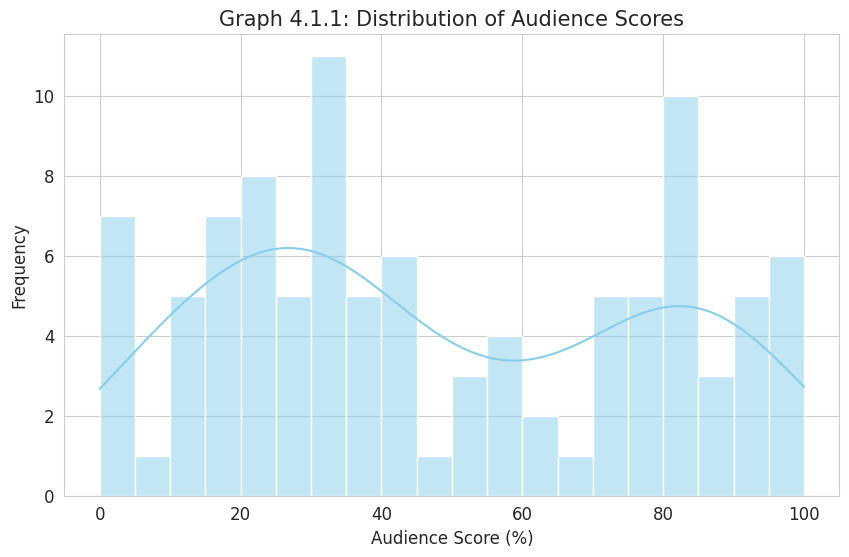

Cell 2: Audience Score Analysis - Complete


In [2]:
# CELL 2: Analysis 1 - Distribution of Audience Scores
#--------------------------------------------------------------------------
print("\n--- Analysis 1: Distribution of Audience Scores ---")
if not final_df.empty and 'audienceScore' in final_df.columns:
    # Table: Summary statistics
    audience_scores_stats = final_df['audienceScore'].dropna().describe()
    print("\nTable 4.1.1: Summary Statistics of Audience Scores")
    print(audience_scores_stats)

    # Graph: Histogram
    plt.figure()
    sns.histplot(final_df['audienceScore'].dropna(), kde=True, bins=20, color='skyblue')
    plt.title('Graph 4.1.1: Distribution of Audience Scores', fontsize=15)
    plt.xlabel('Audience Score (%)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
else:
    print("Skipping Audience Score analysis: 'audienceScore' column missing or final_df empty.")
print("Cell 2: Audience Score Analysis - Complete")



--- Analysis 2: Distribution of TomatoMeter Scores ---

Table 4.2.1: Summary Statistics of TomatoMeter Scores
count    100.000000
mean      56.900000
std       30.467237
min        0.000000
25%       32.750000
50%       61.500000
75%       83.250000
max      100.000000
Name: tomatoMeter, dtype: float64


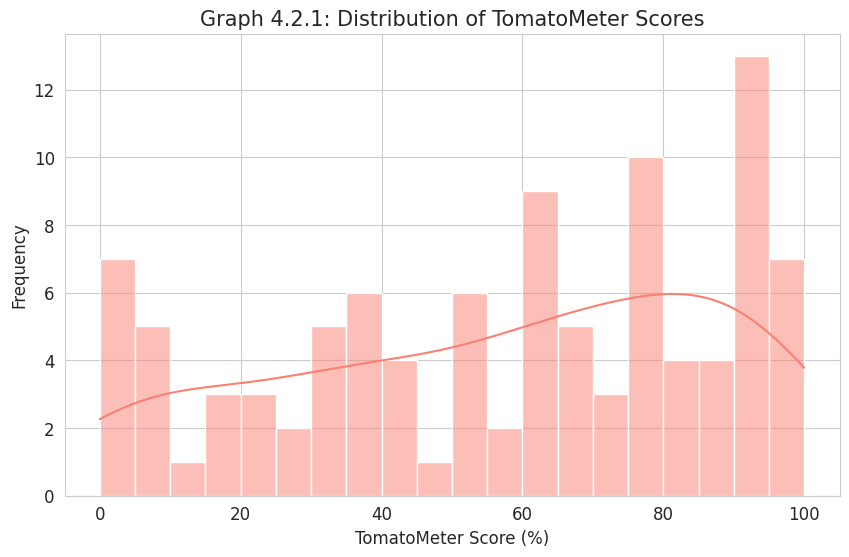

Cell 3: TomatoMeter Analysis - Complete


In [3]:
# CELL 3: Analysis 2 - Distribution of TomatoMeter Scores
#--------------------------------------------------------------------------
print("\n--- Analysis 2: Distribution of TomatoMeter Scores ---")
if not final_df.empty and 'tomatoMeter' in final_df.columns:
    # Table: Summary statistics
    tomatometer_stats = final_df['tomatoMeter'].dropna().describe()
    print("\nTable 4.2.1: Summary Statistics of TomatoMeter Scores")
    print(tomatometer_stats)

    # Graph: Histogram
    plt.figure()
    sns.histplot(final_df['tomatoMeter'].dropna(), kde=True, bins=20, color='salmon')
    plt.title('Graph 4.2.1: Distribution of TomatoMeter Scores', fontsize=15)
    plt.xlabel('TomatoMeter Score (%)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
else:
    print("Skipping TomatoMeter analysis: 'tomatoMeter' column missing or final_df empty.")
print("Cell 3: TomatoMeter Analysis - Complete")


--- Analysis 3: Top N Genres ---

Table 4.3.1: Top 15 Most Common Genres
       Genre  Count
0     Action     40
1  Adventure     20
2     Comedy     20
3      Drama     20
4    Romance     20
5     Sci-Fi     20
6     Horror     20
7   Thriller     20


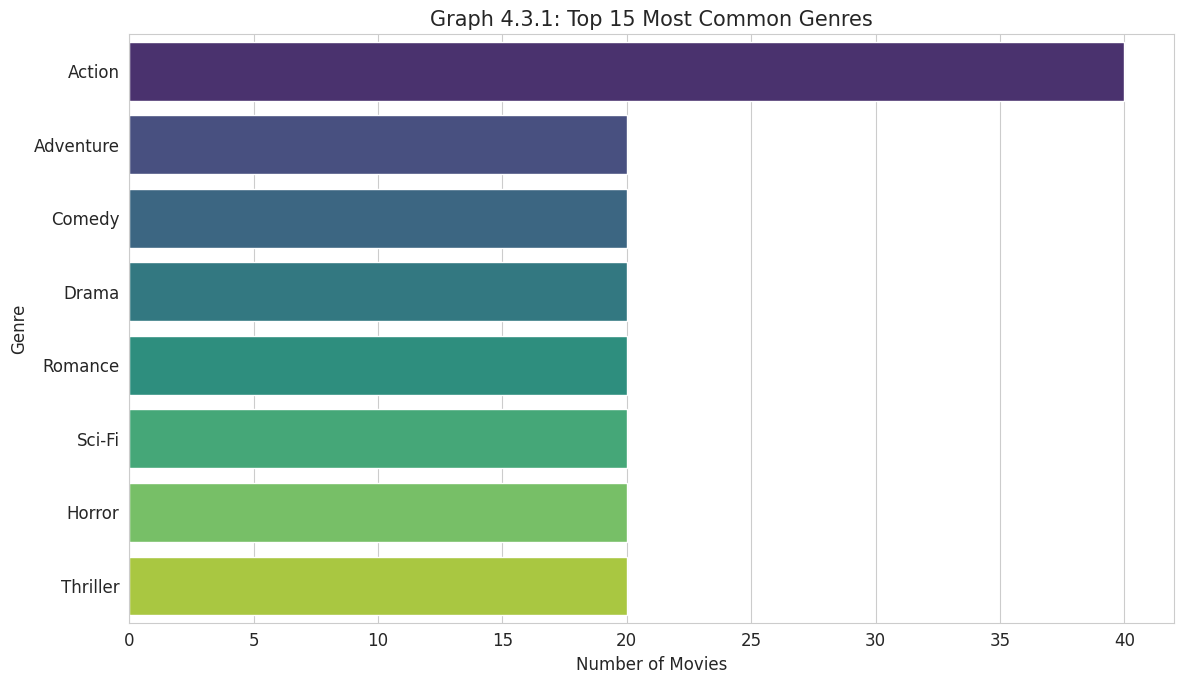

Cell 4: Genre Analysis - Complete


In [4]:
# CELL 4: Analysis 3 - Top N Genres
#--------------------------------------------------------------------------
print("\n--- Analysis 3: Top N Genres ---")
if not final_df.empty and 'genre' in final_df.columns:
    # Process genre column: split comma-separated strings and explode
    all_genres = []
    final_df['genre'].dropna().apply(lambda x: all_genres.extend([genre.strip() for genre in x.split(',') if genre.strip()]))
    genre_counts = Counter(all_genres)
    top_n_genres = 15
    common_genres_df = pd.DataFrame(genre_counts.most_common(top_n_genres), columns=['Genre', 'Count'])

    print(f"\nTable 4.3.1: Top {top_n_genres} Most Common Genres")
    print(common_genres_df)

    # Graph: Bar chart
    plt.figure(figsize=(12, 7)) # Adjusted figure size for better readability
    sns.barplot(x='Count', y='Genre', data=common_genres_df, palette='viridis', hue='Genre', dodge=False, legend=False) # Added hue and dodge
    plt.title(f'Graph 4.3.1: Top {top_n_genres} Most Common Genres', fontsize=15)
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Genre analysis: 'genre' column missing or final_df empty.")
print("Cell 4: Genre Analysis - Complete")


--- Analysis 4: Movies per Release Year (Theatres) ---

Table 4.4.1: Number of Movies Released (Recent Years)
    Movie Count  count
0          2009      8
1          2010      8
2          2011      4
3          2012      2
4          2013      6
5          2014      3
6          2015      3
7          2016      1
8          2017      4
9          2018      2
10         2019      3
11         2020      8
12         2021      6
13         2022      2
14         2023      5


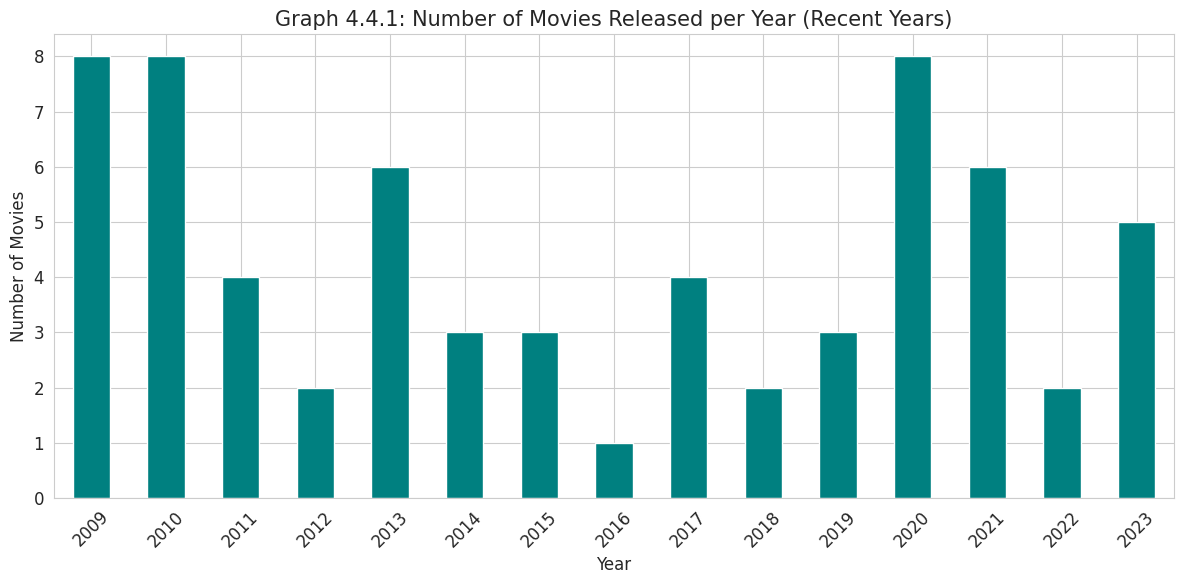

Cell 5: Release Year Analysis - Complete


In [5]:
# CELL 5: Analysis 4 - Movies per Release Year (Theatres)
#--------------------------------------------------------------------------
print("\n--- Analysis 4: Movies per Release Year (Theatres) ---")
if not final_df.empty and 'releaseDateTheatres' in final_df.columns:
    final_df['releaseYearTheatres'] = final_df['releaseDateTheatres'].dropna().dt.year
    movies_per_year = final_df['releaseYearTheatres'].value_counts().sort_index()
    # For table, let's show recent years or a summary
    recent_years_data = movies_per_year.tail(15) # Last 15 years
    print("\nTable 4.4.1: Number of Movies Released (Recent Years)")
    print(recent_years_data.reset_index().rename(columns={'index':'Year', 'releaseYearTheatres':'Movie Count'}))

    # Graph: Bar chart for recent years
    plt.figure(figsize=(12, 6))
    recent_years_data.plot(kind='bar', color='teal')
    plt.title('Graph 4.4.1: Number of Movies Released per Year (Recent Years)', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping Release Year analysis: 'releaseDateTheatres' column missing or final_df empty.")
print("Cell 5: Release Year Analysis - Complete")



--- Analysis 5: Audience Score vs. TomatoMeter ---

Table 4.5.1: Correlation between Audience Score and TomatoMeter
Pearson Correlation Coefficient: -0.10


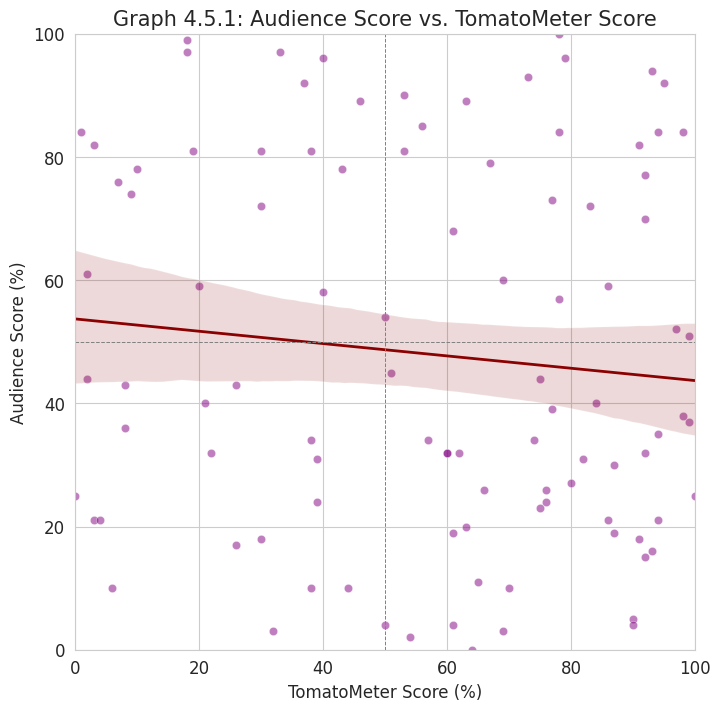

Cell 6: Audience vs TomatoMeter Analysis - Complete


In [6]:
# CELL 6: Analysis 5 - Relationship between Audience Score and TomatoMeter
#--------------------------------------------------------------------------
print("\n--- Analysis 5: Audience Score vs. TomatoMeter ---")
if not final_df.empty and 'audienceScore' in final_df.columns and 'tomatoMeter' in final_df.columns:
    # Table: Correlation coefficient
    # Drop NaNs for correlation calculation
    correlation_data = final_df[['audienceScore', 'tomatoMeter']].dropna()
    correlation = correlation_data['audienceScore'].corr(correlation_data['tomatoMeter'])
    print("\nTable 4.5.1: Correlation between Audience Score and TomatoMeter")
    print(f"Pearson Correlation Coefficient: {correlation:.2f}")

    # Graph: Scatter plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x='tomatoMeter', y='audienceScore', data=correlation_data, alpha=0.5, color='purple')
    # Add a regression line
    sns.regplot(x='tomatoMeter', y='audienceScore', data=correlation_data, scatter=False, color='darkred', line_kws={'linewidth':2})
    plt.title('Graph 4.5.1: Audience Score vs. TomatoMeter Score', fontsize=15)
    plt.xlabel('TomatoMeter Score (%)', fontsize=12)
    plt.ylabel('Audience Score (%)', fontsize=12)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.axhline(50, color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(50, color='grey', linestyle='--', linewidth=0.7)
    plt.show()
else:
    print("Skipping Audience vs TomatoMeter analysis: one or both score columns missing or final_df empty.")
print("Cell 6: Audience vs TomatoMeter Analysis - Complete")


--- Analysis 6: Sentiment of Aggregated Critic Snippets (Conceptual) ---
Added dummy 'critic_snippet_sentiment_label' column for demonstration.

Table 4.6.1: Distribution of Sentiment in Aggregated Critic Snippets
      Count  count
0  positive     53
1   neutral     29
2  negative     18


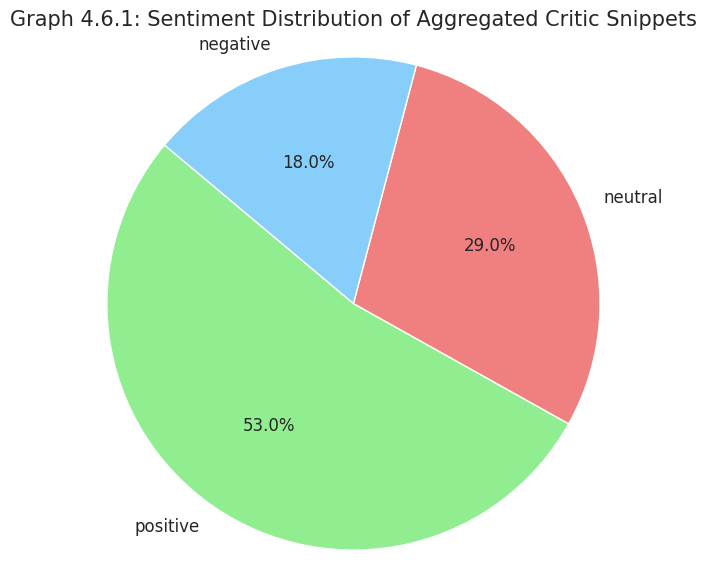

Cell 7: Critic Snippet Sentiment Analysis (Conceptual) - Complete

--- EDA SCRIPT FINISHED ---


In [7]:
# CELL 7: Analysis 6 - (Conceptual) Sentiment of Aggregated Critic Snippets
# For this, you'd need a sentiment analysis library like VADER or TextBlob
# This cell demonstrates how you *could* approach it if sentiment scores were added
# to final_df during preprocessing.
#--------------------------------------------------------------------------
print("\n--- Analysis 6: Sentiment of Aggregated Critic Snippets (Conceptual) ---")
# Assuming you have a column 'critic_snippet_sentiment_label' in final_df
# (e.g., 'positive', 'negative', 'neutral') added during preprocessing.
# If not, this is a placeholder for how you might analyze it.

# Example: Add a dummy sentiment column to final_df for demonstration
if not final_df.empty and 'critic_review_snippets' in final_df.columns: # Check if snippets exist
    # For actual sentiment, you'd use a library. Here's a dummy assignment:
    if 'critic_snippet_sentiment_label' not in final_df.columns:
        np.random.seed(42) # for reproducibility
        final_df['critic_snippet_sentiment_label'] = np.random.choice(['positive', 'neutral', 'negative'],
                                                                  size=len(final_df),
                                                                  p=[0.5, 0.3, 0.2])
        print("Added dummy 'critic_snippet_sentiment_label' column for demonstration.")

if not final_df.empty and 'critic_snippet_sentiment_label' in final_df.columns:
    sentiment_counts = final_df['critic_snippet_sentiment_label'].value_counts()
    print("\nTable 4.6.1: Distribution of Sentiment in Aggregated Critic Snippets")
    print(sentiment_counts.reset_index().rename(columns={'index':'Sentiment', 'critic_snippet_sentiment_label':'Count'}))

    # Graph: Pie chart
    plt.figure(figsize=(7,7))
    if not sentiment_counts.empty:
        plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightskyblue'])
        plt.title('Graph 4.6.1: Sentiment Distribution of Aggregated Critic Snippets', fontsize=15)
        plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
    else:
        print("No sentiment data to plot.")
else:
    print("Skipping Critic Snippet Sentiment analysis: 'critic_snippet_sentiment_label' column missing or final_df empty.")
    print("To perform this analysis, you would first need to calculate sentiment scores for 'critic_review_snippets' and add them as a new column during preprocessing.")

print("Cell 7: Critic Snippet Sentiment Analysis (Conceptual) - Complete")
print("\n--- EDA SCRIPT FINISHED ---")